In [1]:
# %load_ext autoreload
# %autoreload 2
import ijscripting

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skimage.data

In [3]:
script = ijscripting.ScriptingClient() # create client and connect to scripting server

# Example 1

<type 'numpy.ndarray'> (303, 384) uint8


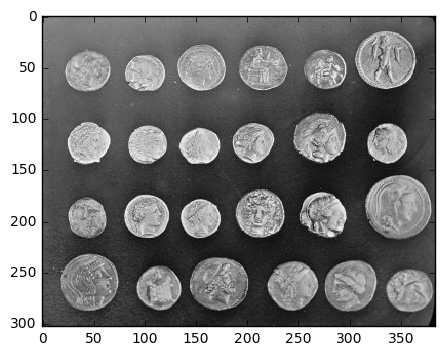

In [4]:
img = skimage.data.coins()
print type(img), img.shape, img.dtype
plt.gray(); plt.imshow(img,interpolation="nearest");

<type 'numpy.ndarray'> (303, 384) uint8


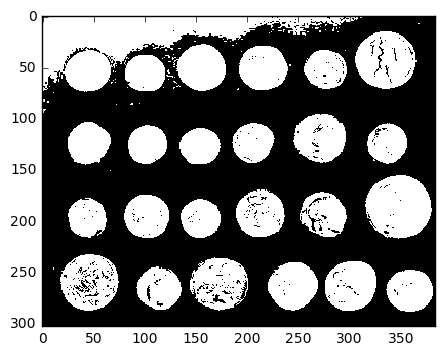

In [5]:
code = 'thresholded = ij.op().convert().uint8( ij.op().threshold().otsu(img) )'
output = script.run(code, 'whatever.groovy', outputs={'thresholded':np.ndarray}, headless=True, img=img)
print type(output.thresholded), output.thresholded.shape, output.thresholded.dtype
plt.gray(); plt.imshow(output.thresholded,interpolation="nearest");

# Example 2

<type 'numpy.ndarray'> (400, 600, 3) uint8


(85, 98.615954166666668)

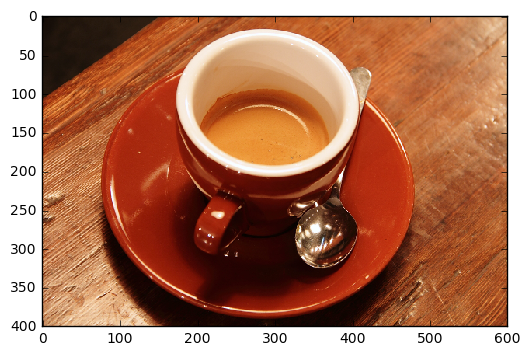

In [6]:
img = skimage.data.coffee()
print type(img), img.shape, img.dtype
plt.gray(); plt.imshow(img,interpolation="nearest");
int(np.median(img)), np.mean(img)

In [7]:
code = '''
mean = Double.parseDouble((String)ij.op().stats().mean(img))
median = (int)Double.parseDouble((String)ij.op().stats().median(img))
'''
output = script.run(code, 'whatever.groovy', outputs={'mean':float,'median':int}, headless=True, img=img)
output.median, output.mean

(85, 98.61595416666667)

# Example 3

<type 'numpy.ndarray'> (3, 400, 600) uint8


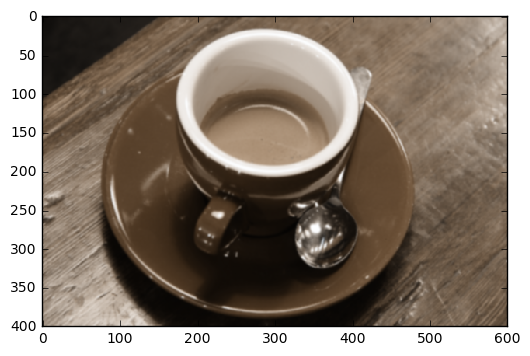

In [8]:
code = '''
blurred = ij.op().filter().gauss(img, sigma)
ij.ui().show(blurred) // open blurred image in ImageJ
'''
output = script.run(code, 'whatever.groovy', outputs={'blurred':np.ndarray}, headless=False, img=img, sigma=1)
print type(output.blurred), output.blurred.shape, output.blurred.dtype
plt.gray(); plt.imshow(np.transpose(output.blurred,(1,2,0)),interpolation="nearest");

# Example 4

<type 'numpy.ndarray'> (512, 512) uint8


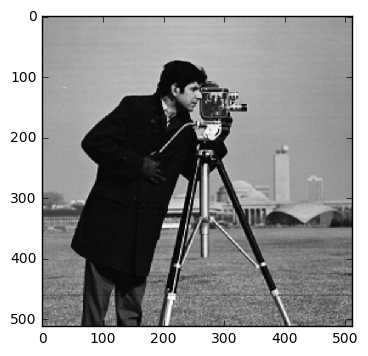

In [9]:
img = skimage.data.camera()
print type(img), img.shape, img.dtype
plt.gray(); plt.imshow(img,interpolation="nearest");

In [10]:
def ij_open(img):
    script.run('ij.ui().show(img)','open.groovy', img=img)
def ij_bdvopen(img,name="img",options=None):
    if img.ndim == 2 and not options:
        ij_bdvopen(img,name,'.is2D()')
    else:
        script.run(
            'import bdv.util.*\nBdvFunctions.show(img,name%s)' % (',BdvOptions.options()'+options if options else ''),
            'open.groovy', img=img, name=name)

In [11]:
ij_open(img)    # open image
ij_bdvopen(img) # open with BigDataViewer